In [1]:
%load_ext autoreload
%autoreload 2

2.306660114539844
testing prominence 2.306660114539844


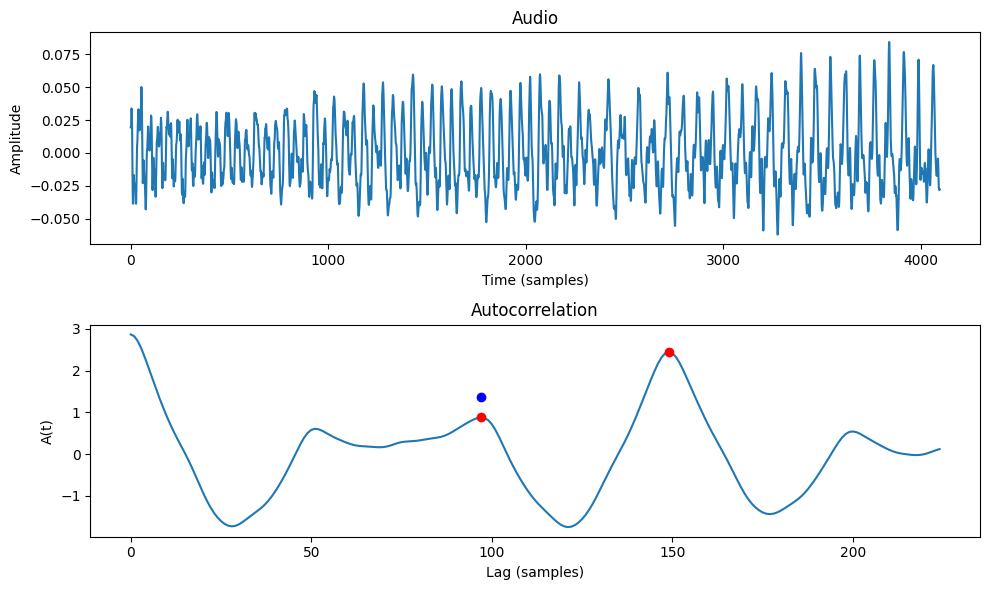

In [7]:
import sys
sys.path.append('..')

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

from algorithms.pitch.autocorrelation import autocorrelation_fft
from algorithms.pitch.peak_picking import parabolic_interpolation
from algorithms.pitch.preprocess import preprocess_audio

AUDIO_FILEPATH = "../data/fugue.mp3"
x, sr = sf.read(AUDIO_FILEPATH, always_2d=True)

# convert to mono
x = preprocess_audio(x, iir_cutoff_freq=150)

# get only the audio we want
FRAME_SIZE = 2048*2
start_idx = int(1.25 * sr)
x2 = x[start_idx:start_idx+FRAME_SIZE]
acf, _ = autocorrelation_fft(x2, 225)

# prominent peak-picking
prominence = abs((np.max(acf) - np.min(acf))/2)
print(prominence)

n = 5
for i in range(0, n):
    p = prominence - prominence*(i/n)
    print(f"testing prominence {p}")
    acf_peaks, _ = find_peaks(acf, prominence=p)
    if len(acf_peaks) > 0:
        break

better_peak = parabolic_interpolation(acf, acf_peaks[0])

# plot
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].set_title("Audio")
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel("Amplitude")
axs[0].plot(x2)

axs[1].plot(acf)
axs[1].plot(acf_peaks, acf[acf_peaks], 'ro')
axs[1].plot(better_peak, acf[acf_peaks[0]]+0.5, 'bo')
axs[1].set_xlabel('Lag (samples)')
axs[1].set_ylabel('A(t)')
axs[1].set_title("Autocorrelation")
plt.tight_layout()

plt.show()

In [ ]:
import sys
sys.path.append('..')

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

from algorithms.PitchDetector import Yin
from data_structures.recording.PitchData import PitchConfig
from algorithms.pitch.preprocess import preprocess_audio

AUDIO_FILEPATH = "../data/fugue.mp3"
x, sr = sf.read(AUDIO_FILEPATH, always_2d=True)

# convert to mono
x = preprocess_audio(x, iir_cutoff_freq=150)

# get only the audio we want
FRAME_SIZE = 2048*2
start_idx = int(1.25 * sr)
x2 = x[start_idx:start_idx+FRAME_SIZE]

pc = PitchConfig(tuning=440, fmin=196, fmax=5000)
yanger = Yin(pc, sr)
pitches, acf_peaks, acf, cdf = yanger.yang(x2, 0)

for p in pitches:
    print(f"pitch freq={p.frequency}, prob={p.probability}, vol={p.volume}")

pitch freq=295.91876004606615, prob=0.49392344867677773, vol=0.02646059771170016
pitch freq=454.51734445526824, prob=8.943773111635216e-05, vol=0.02646059771170016


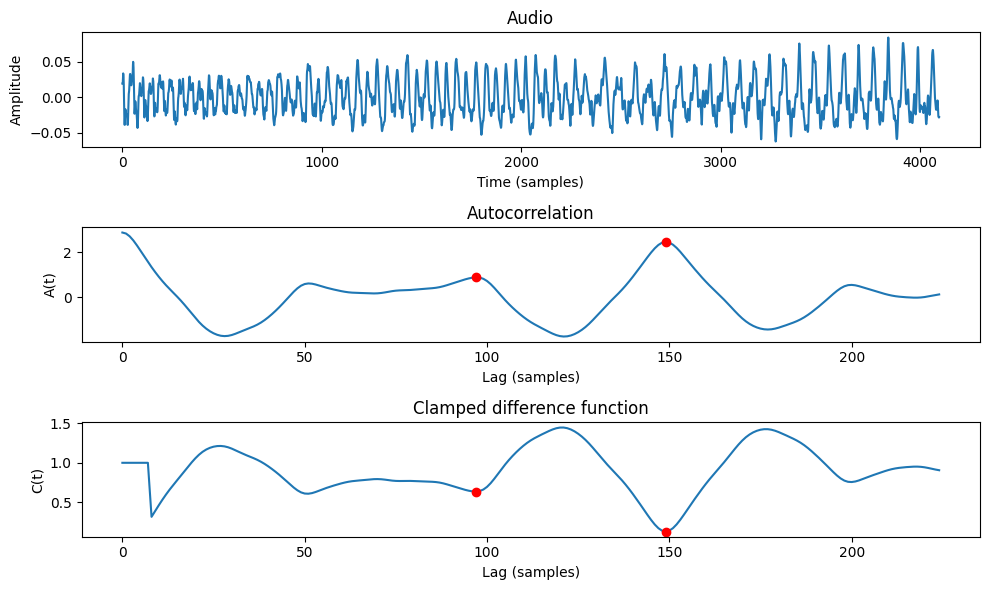

In [37]:
# plot
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].set_title("Audio")
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel("Amplitude")
axs[0].plot(x2)

axs[1].plot(acf)
axs[1].plot(acf_peaks, acf[acf_peaks], 'ro')
axs[1].set_xlabel('Lag (samples)')
axs[1].set_ylabel('A(t)')
axs[1].set_title("Autocorrelation")

axs[2].plot(cdf)
axs[2].plot(acf_peaks, cdf[acf_peaks], 'ro')
axs[2].set_xlabel('Lag (samples)')
axs[2].set_ylabel('C(t)')
axs[2].set_title("Clamped difference function")
plt.tight_layout()

plt.show()